# All the dependencies

In [112]:
#will keep all dependence in 1st cell
import pandas as pd
import numpy as np
import random 
import matplotlib.pyplot as plt
import seaborn as sns


# Data Extraction 

In [113]:
# Replace 'your_file.xlsx' with the path to your Excel file.
file_path = 'bank.xlsx'

# Read the Excel file into a DataFrame.
# you can create dataframe from different source, pd.DataFrame(data), pd.read_csv(file_path), pd.read_json(file_path), 
#pd.read_sql(query, connection)
bank_df = pd.read_excel(file_path)

print(type(bank_df))
# Display the first few rows of the DataFrame to verify the data.
print(bank_df.head(5))


<class 'pandas.core.frame.DataFrame'>
      Account No       DATE               TRANSACTION DETAILS  CHQ.NO.  \
0  409000611074' 2017-06-29  TRF FROM  Indiaforensic SERVICES      NaN   
1  409000611074' 2017-07-05  TRF FROM  Indiaforensic SERVICES      NaN   
2  409000611074' 2017-07-18        FDRL/INTERNAL FUND TRANSFE      NaN   
3  409000611074' 2017-08-01   TRF FRM  Indiaforensic SERVICES      NaN   
4  409000611074' 2017-08-16        FDRL/INTERNAL FUND TRANSFE      NaN   

  VALUE DATE  WITHDRAWAL AMT  DEPOSIT AMT  BALANCE AMT  .  
0 2017-06-29             NaN    1000000.0    1000000.0  .  
1 2017-07-05             NaN    1000000.0    2000000.0  .  
2 2017-07-18             NaN     500000.0    2500000.0  .  
3 2017-08-01             NaN    3000000.0    5500000.0  .  
4 2017-08-16             NaN     500000.0    6000000.0  .  


# NaN in Pandas is equivalent to NULL in SQL

# Data Cleaning

In [114]:
#remove character from text # text.lstrip() #form left, text.rstrip() #from right, text.strip()
#strip() removes characters from both ends of a string.

#to remove only first occurance of character the you need to using find() find index and replace.
#find() locates the index of the first occurrence of a character or substring in a string, which can be used for further string manipulation

#replace() replaces specified characters or substrings in a string.

# text = "Hello, World!!!"
# result = text.rstrip("!")
# print(result)  
# text = "##This is a sample text!!!"
# result = text.lstrip("#")
# print(result)  
# text = "This is a sample text with some a's and b's."
# char_to_remove = 'a'  # The character you want to remove
# # Remove all occurrences of the specified character
# modified_text = text.replace(char_to_remove, '')
# print(modified_text)

In [115]:
#check for columns in df 
#print(bank_df.columns)
bank_df.drop('.', axis=1)
bank_df
#check data type values in each column 
# acc=bank_df.loc[0]['CHQ.NO.']
# print(type(acc))

# rstrip to remove character on right of account number 
bank_df['Account No'] = bank_df['Account No'].str.rstrip("'").astype(np.int64) # normal int is 32 bit, so used int64
print(bank_df)

# #chnage the data typeof check number to str 
bank_df['CHQ.NO.'] = bank_df['CHQ.NO.'].astype(str)


# #fill nan check number with random numbers 
def generate_checknums():
    return random.randint(1000000, 10000000)

bank_df['CHQ.NO.'].fillna(generate_checknums(), inplace=True)

print(bank_df)




          Account No       DATE               TRANSACTION DETAILS  CHQ.NO.  \
0       409000611074 2017-06-29  TRF FROM  Indiaforensic SERVICES      NaN   
1       409000611074 2017-07-05  TRF FROM  Indiaforensic SERVICES      NaN   
2       409000611074 2017-07-18        FDRL/INTERNAL FUND TRANSFE      NaN   
3       409000611074 2017-08-01   TRF FRM  Indiaforensic SERVICES      NaN   
4       409000611074 2017-08-16        FDRL/INTERNAL FUND TRANSFE      NaN   
...              ...        ...                               ...      ...   
116196  409000362497 2019-03-05  TRF TO 1196428  Indiaforensic SE      NaN   
116197  409000362497 2019-03-05        FDRL/INTERNAL FUND TRANSFE      NaN   
116198  409000362497 2019-03-05        FDRL/INTERNAL FUND TRANSFE      NaN   
116199  409000362497 2019-03-05                 IMPS 05-03-20194C      NaN   
116200  409000362497 2019-03-05         Sweep Trf To: 40900036427      NaN   

       VALUE DATE  WITHDRAWAL AMT  DEPOSIT AMT   BALANCE AMT  .

# EDA Exploratory Data Analysis 

Summary Statistics:
         Account No  WITHDRAWAL AMT   DEPOSIT AMT   BALANCE AMT
count  1.162010e+05    5.354900e+04  6.265200e+04  1.162010e+05
mean   2.002261e+11    4.489190e+06  3.806586e+06 -1.404852e+09
std    2.044558e+11    1.084850e+07  8.683093e+06  5.348202e+08
min    1.196428e+06    1.000000e-02  1.000000e-02 -2.045201e+09
25%    1.196428e+06    3.000000e+03  9.900000e+04 -1.690383e+09
50%    1.196711e+06    4.708300e+04  4.265000e+05 -1.661395e+09
75%    4.090004e+11    5.000000e+06  4.746411e+06 -1.236888e+09
max    4.090006e+11    4.594475e+08  5.448000e+08  8.500000e+06


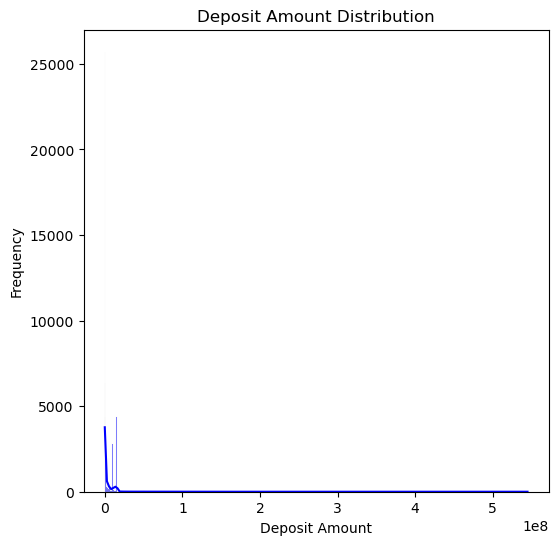

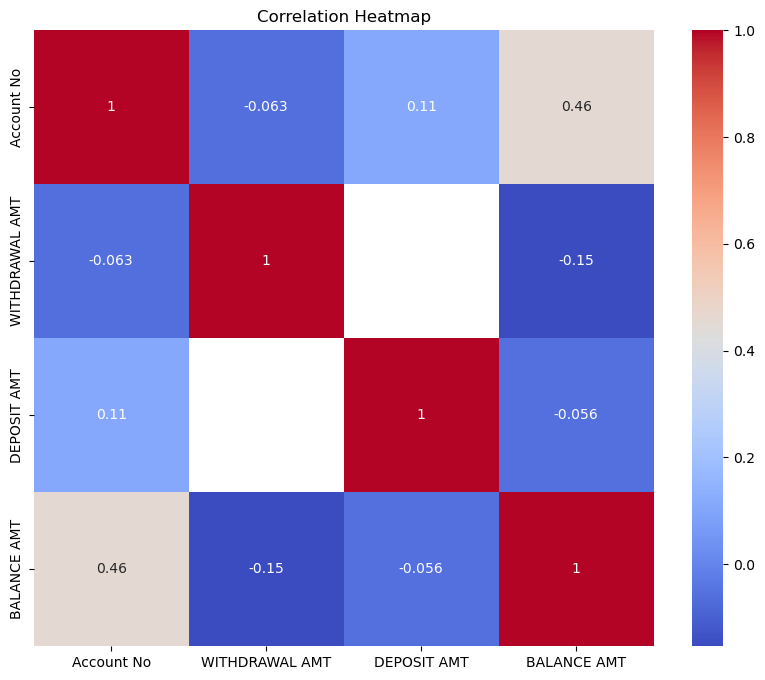

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the bank_df DataFrame (assuming you've already loaded it)
# If not, you can use the code to load it as shown before.

# 1. Summary Statistics
summary_stats = bank_df.describe()
print("Summary Statistics:")
print(summary_stats)

# 2. Data Distributions (Histograms)
plt.figure(figsize=(6, 6))
sns.histplot(bank_df['DEPOSIT AMT'], kde=True, color='blue') #Kernel Density Estimation.
plt.title('Deposit Amount Distribution')
plt.xlabel('Deposit Amount')
plt.ylabel('Frequency')
plt.show()


# 3. Correlations
#When you apply bank_df.corr(), it computes correlations for all the numerical columns in the DataFrame.
correlation_matrix = bank_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# Data Transformation:

In [117]:
#Create a New Column:
bank_df['Total Amount'] = bank_df['DEPOSIT AMT'] + bank_df['WITHDRAWAL AMT']

#Data Filtering:
filtered_df = bank_df[bank_df['DEPOSIT AMT'] > 2000]

#Data Aggregation:
account_summary = bank_df.groupby('Account No')['DEPOSIT AMT'].sum().reset_index()
print(account_summary)

     Account No   DEPOSIT AMT
0       1196428  6.838251e+10
1       1196711  4.587889e+10
2  409000362497  1.017209e+11
3  409000405747  2.287852e+08
4  409000425051  2.703186e+07
5  409000438611  4.705899e+09
6  409000438620  1.720243e+10
7  409000493201  9.565931e+07
8  409000493210  1.022096e+08
9  409000611074  1.458596e+08


# Data Loading:

In [124]:
from sqlalchemy import create_engine
server_name = "GRAPHENE_PRAFUL\SQLEXPRESS"
database_name = "DATA_PRACTICE"
conn_str = f"mssql+pyodbc://{server_name}/{database_name}?driver=ODBC+Driver+17+for+SQL+Server"
engine = create_engine(conn_str)

print(engine)

Engine(mssql+pyodbc://GRAPHENE_PRAFUL\SQLEXPRESS/DATA_PRACTICE?driver=ODBC+Driver+17+for+SQL+Server)


In [125]:
table_name = "FilteredData"
filtered_df.to_sql(table_name, engine, if_exists="replace", index=False)


-1